In [182]:
import numpy as np # to work with arrays
import pandas as pd # For Data Analysis
import matplotlib.pyplot as plt # For Data Visualization
import warnings
warnings.filterwarnings('ignore')

In [214]:
#Loading data from Excel. 
filepath = 'E:\\IPBA\BYOP\Final\IPBA_BYOP-SudeepVenkata-IPBA_BYOP\CPG_Master_data_Set.xlsx' 
xlSheet = 'Sheet1'
dataset = pd.read_excel(io=filepath, sheet_name = xlSheet)
dataset.head(10)

,Invoice,Product_Code,Quantity,InvoiceDate,InvoiceDate_timeStamp,Price,Customer_ID,Country,Pack_Size_Code,In_Store_Promotion_Flag,Online_Promotion_Flag,Shelf_Space_Code
0,89058,7259395,3,2019-04-20,2019-04-20 06:02:02.338,62,38055,USA,3,0,0,3
1,89058,10557,5,2019-04-20,2019-04-20 06:02:02.338,37,38055,USA,3,1,0,1
2,89058,2733507,3,2019-04-20,2019-04-20 06:02:02.338,48,38055,USA,1,1,0,1
3,89058,5200349,5,2019-04-20,2019-04-20 06:02:02.338,100,38055,USA,4,1,1,2
4,89058,715497,3,2019-04-20,2019-04-20 06:02:02.338,91,38055,USA,2,1,1,1
5,89058,64923,4,2019-04-20,2019-04-20 06:02:02.338,29,38055,USA,3,0,1,2
6,89058,73186,4,2019-04-20,2019-04-20 06:02:02.338,6,38055,USA,2,1,1,2
7,89058,3611064,3,2019-04-20,2019-04-20 06:02:02.338,65,38055,USA,2,0,1,1
8,89058,211214,4,2019-04-20,2019-04-20 06:02:02.338,31,38055,USA,2,0,0,2
9,89058,897016,6,2019-04-20,2019-04-20 06:02:02.338,19,38055,USA,4,0,0,1


In [215]:
ds = dataset[['InvoiceDate', 'Quantity', 'Price']]
ds['Sales Amount'] = ds.loc[:,('Price')] * ds.loc[:,('Quantity')]
ds.head(5)


,InvoiceDate,Quantity,Price,Sales Amount
0,2019-04-20,3,62,186
1,2019-04-20,5,37,185
2,2019-04-20,3,48,144
3,2019-04-20,5,100,500
4,2019-04-20,3,91,273


In [216]:
ds = ds[['InvoiceDate', 'Sales Amount']]
ds.head(10)
print(ds)

        InvoiceDate  Sales Amount
0        2019-04-20           186
1        2019-04-20           185
2        2019-04-20           144
3        2019-04-20           500
4        2019-04-20           273
...             ...           ...
802995  2022-12-04             21
802996  2022-12-04             81
802997  2022-12-04            132
802998  2022-12-04            250
802999  2022-12-04            135

[803000 rows x 2 columns]


In [217]:
ds = ds[['InvoiceDate','Sales Amount']]
ds = ds.groupby('InvoiceDate')[['Sales Amount']].sum()
ds.reset_index(inplace=True)
print(ds)

      InvoiceDate  Sales Amount
0      2019-04-20         23330
1      2019-04-21         96254
2      2019-04-22         73025
3      2019-04-23         89384
4      2019-04-24         49600
...           ...           ...
1320  2022-11-30         230929
1321  2022-12-01         175264
1322  2022-12-02         304611
1323  2022-12-03         195378
1324  2022-12-04         280438

[1325 rows x 2 columns]


In [218]:
#  index variable as invoicedate
ds['InvoiceDate'] = pd.to_datetime(ds['InvoiceDate'], infer_datetime_format = True)
indexedDataset = ds.set_index(['InvoiceDate'])

In [219]:
from datetime import datetime
indexedDataset.head(5)

,Sales Amount
InvoiceDate,
2019-04-20,23330
2019-04-21,96254
2019-04-22,73025
2019-04-23,89384
2019-04-24,49600


In [220]:
indexedDataset.shape
indexedDataset.info()
indexedDataset.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1325 entries, 2019-04-20 to 2022-12-04
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Sales Amount  1325 non-null   int64
dtypes: int64(1)
memory usage: 20.7 KB


,Sales Amount
count,1325.000000
mean,110726.094340
std,48553.525663
min,18752.000000
25%,74976.000000
50%,103256.000000
75%,138337.000000
max,349397.000000


Text(0.5, 1.0, 'How Data will look like')

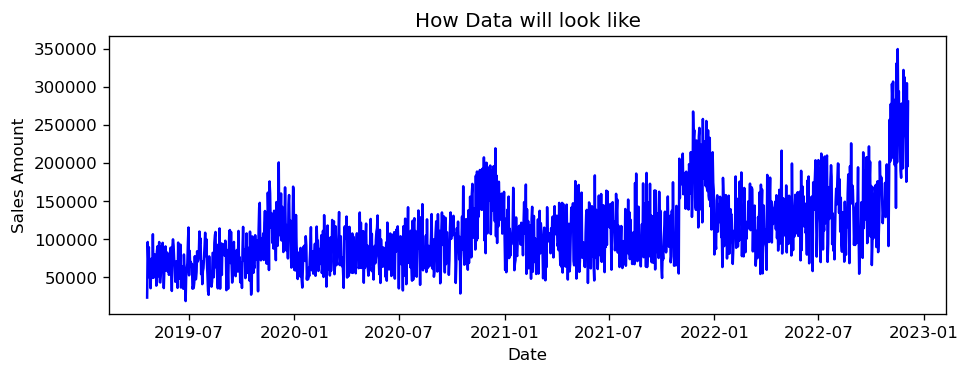

In [221]:
#Plot Graph
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.plot(indexedDataset,color='blue')
plt.title("How Data will look like")

In [222]:
#Determining rolling statistics with 30 Days
rolmean = indexedDataset.rolling(window=30).mean()

rolstd = indexedDataset.rolling(window=30).std()
print(rolmean,rolstd)

              Sales Amount
InvoiceDate               
2019-04-20             NaN
2019-04-21             NaN
2019-04-22             NaN
2019-04-23             NaN
2019-04-24             NaN
...                    ...
2022-11-30   248186.533333
2022-12-01   248090.733333
2022-12-02   249686.133333
2022-12-03   249465.966667
2022-12-04   249569.433333

[1325 rows x 1 columns]              Sales Amount
InvoiceDate              
2019-04-20            NaN
2019-04-21            NaN
2019-04-22            NaN
2019-04-23            NaN
2019-04-24            NaN
...                   ...
2022-11-30   52353.361741
2022-12-01   52488.416981
2022-12-02   53478.709758
2022-12-03   53695.029546
2022-12-04   53753.539786

[1325 rows x 1 columns]


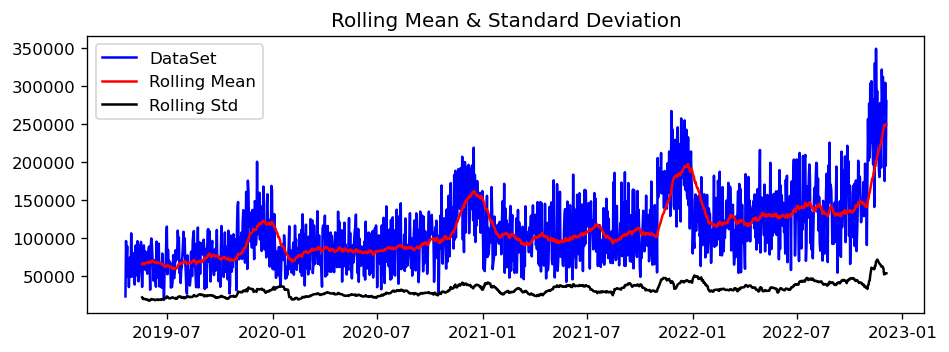

In [223]:
# plot rolling statistics:
orig = plt.plot(indexedDataset, color='blue',label='DataSet')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [224]:
# Performing Dickey - Fuller Test
from statsmodels.tsa.stattools import adfuller 

print('Results of Dickey Fuller Test')
dftest = adfuller(indexedDataset['Sales Amount'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-Value','#Lags Used','No. Of Observations Used'])

print(dfoutput)   

print('\nCritical Values: ')
for key, val in dftest[4].items():
    print(key,':',val)
    if dftest[0] < val:
        print('Null Hypothesis Rejected. Time Series is Stationary')
    else:
        print('Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence')
    


Results of Dickey Fuller Test
Test Statistic                -1.787183
P-Value                        0.386843
#Lags Used                    11.000000
No. Of Observations Used    1313.000000
dtype: float64

Critical Values: 
1% : -3.435340198430096
Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence
5% : -2.863743768394356
Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence
10% : -2.567943297315671
Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence


Text(0.5, 1.0, 'Estimating Trend')

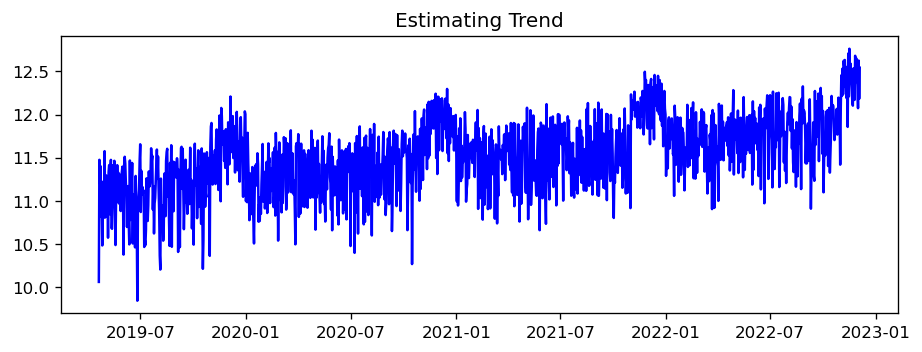

In [225]:
#Estimating Trend - Log of the dataset. T
indexedDataset_logscale = np.log(indexedDataset)
plt.plot(indexedDataset_logscale,color='blue')
plt.title('Estimating Trend')

Text(0.5, 1.0, 'Moving average')

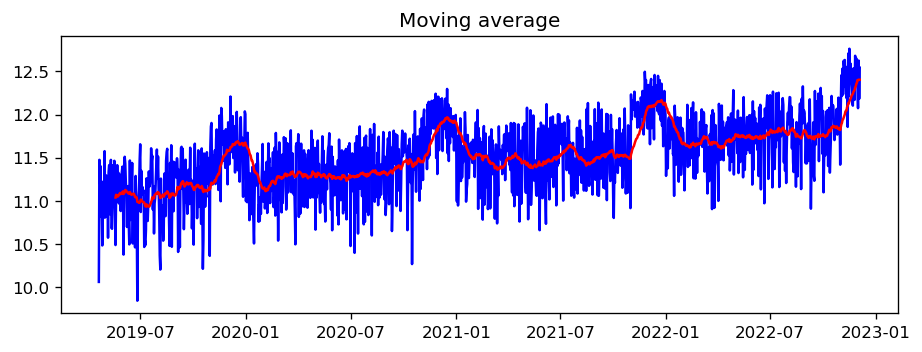

In [226]:
# Calculating moving average
movingAverage = indexedDataset_logscale.rolling(window=30).mean()
movingSTD = indexedDataset_logscale.rolling(window=30).std()
plt.plot(indexedDataset_logscale, color='blue')
plt.plot(movingAverage, color = 'red')
plt.title('Moving average')
# with below graph we can conclude that mean is not stationary. moving with the time

In [228]:
# Difference between Moving average and actual sales amount
datasetLogScaleMinusMovingAverage =  indexedDataset_logscale - movingAverage
datasetLogScaleMinusMovingAverage.head(5)

,Sales Amount
InvoiceDate,
2019-04-20,NaN
2019-04-21,NaN
2019-04-22,NaN
2019-04-23,NaN
2019-04-24,NaN


In [229]:
datasetLogScaleMinusMovingAverage.tail(5)

,Sales Amount
InvoiceDate,
2022-11-30,-0.049610
2022-12-01,-0.324885
2022-12-02,0.222160
2022-12-03,-0.220831
2022-12-04,0.140214


In [230]:
#Removing NaN values from datasetLogScaleMinusMovingAverage
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(5)

,Sales Amount
InvoiceDate,
2019-05-19,-0.551801
2019-05-20,-0.045009
2019-05-21,-0.070756
2019-05-22,0.352861
2019-05-23,-0.008381


In [231]:
from statsmodels.tsa.stattools import adfuller
def  test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=30).mean()
    movingSTD = timeseries.rolling(window=30).std()
    
    #Plot Rolling Statistics
    orig = plt.plot(timeseries, color='blue',label='DataSet')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Performing Dickey - Fuller Test
    print('Results of Dickey Fuller Test')
    dftest = adfuller(indexedDataset['Sales Amount'])
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-Value','#Lags Used','No. Of Observations Used'])
    print(dfoutput)     
    print('\nCritical Values: ')
    for key, val in dftest[4].items():
        print(key,':',val)
        if dftest[0] < val:
            print('Null Hypothesis Rejected. Time Series is Stationary')
        else:
            print('Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence')
    

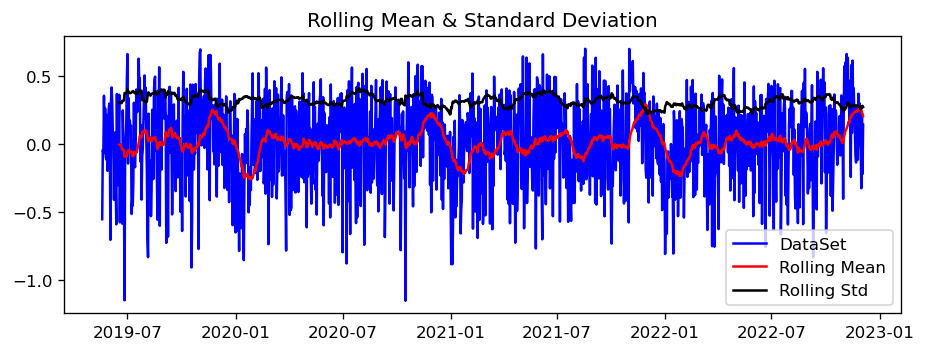

Results of Dickey Fuller Test
Test Statistic                -1.787183
P-Value                        0.386843
#Lags Used                    11.000000
No. Of Observations Used    1313.000000
dtype: float64

Critical Values: 
1% : -3.435340198430096
Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence
5% : -2.863743768394356
Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence
10% : -2.567943297315671
Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence


In [232]:
test_stationarity(datasetLogScaleMinusMovingAverage)

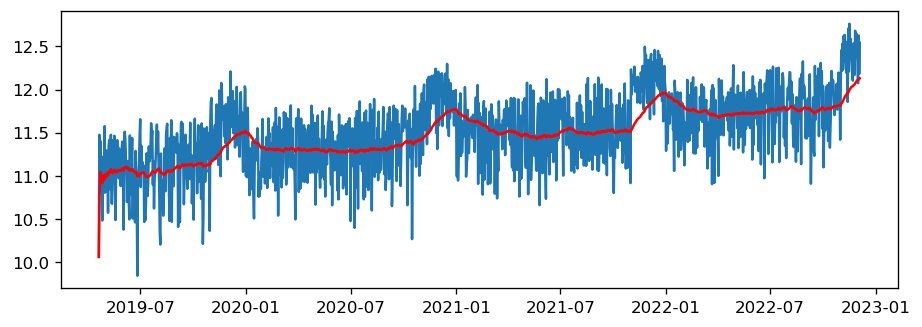

In [233]:
exponentialDecayWeightedAverage = indexedDataset_logscale.ewm(halflife=30, min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialDecayWeightedAverage, color='red')

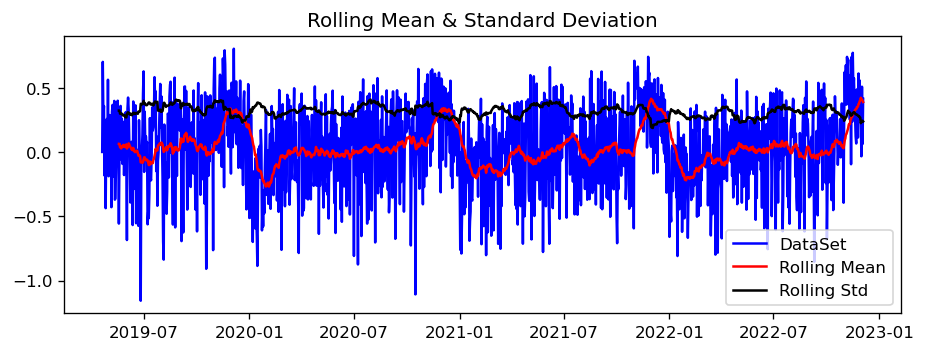

Results of Dickey Fuller Test
Test Statistic                -1.787183
P-Value                        0.386843
#Lags Used                    11.000000
No. Of Observations Used    1313.000000
dtype: float64

Critical Values: 
1% : -3.435340198430096
Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence
5% : -2.863743768394356
Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence
10% : -2.567943297315671
Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence


In [234]:
datasetLogScaleMinusMovingExponentialDecayWeightedAverage = indexedDataset_logscale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayWeightedAverage)

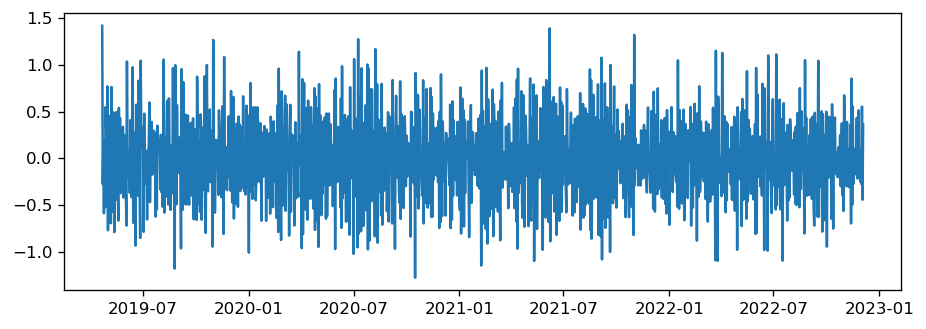

In [235]:
datasetLogDiffShifting = indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(datasetLogDiffShifting)

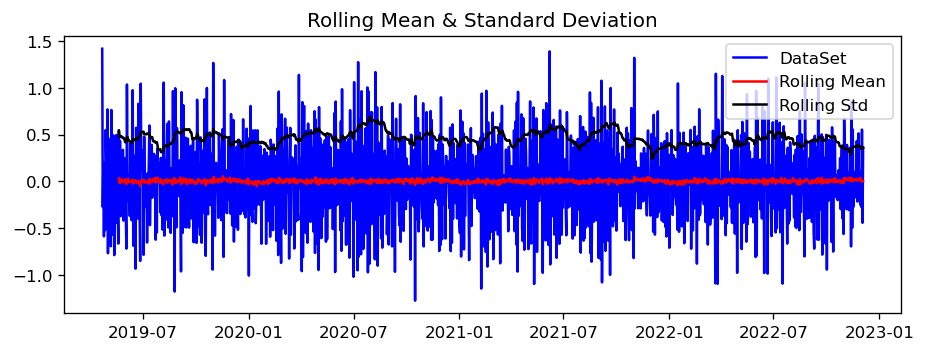

Results of Dickey Fuller Test
Test Statistic                -1.787183
P-Value                        0.386843
#Lags Used                    11.000000
No. Of Observations Used    1313.000000
dtype: float64

Critical Values: 
1% : -3.435340198430096
Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence
5% : -2.863743768394356
Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence
10% : -2.567943297315671
Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence


In [236]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

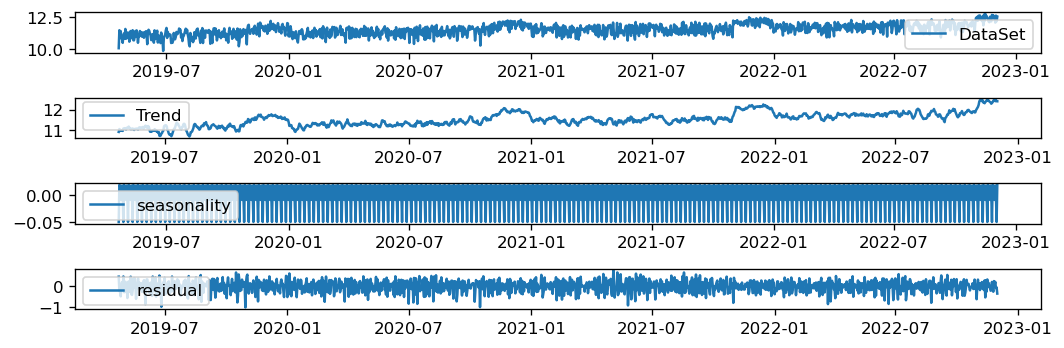

In [237]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logscale, label='DataSet')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
plt.tight_layout()


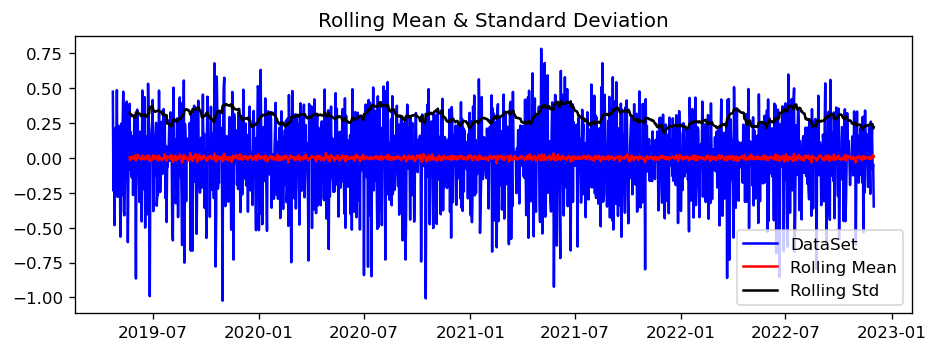

Results of Dickey Fuller Test
Test Statistic                -1.787183
P-Value                        0.386843
#Lags Used                    11.000000
No. Of Observations Used    1313.000000
dtype: float64

Critical Values: 
1% : -3.435340198430096
Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence
5% : -2.863743768394356
Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence
10% : -2.567943297315671
Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence


In [238]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

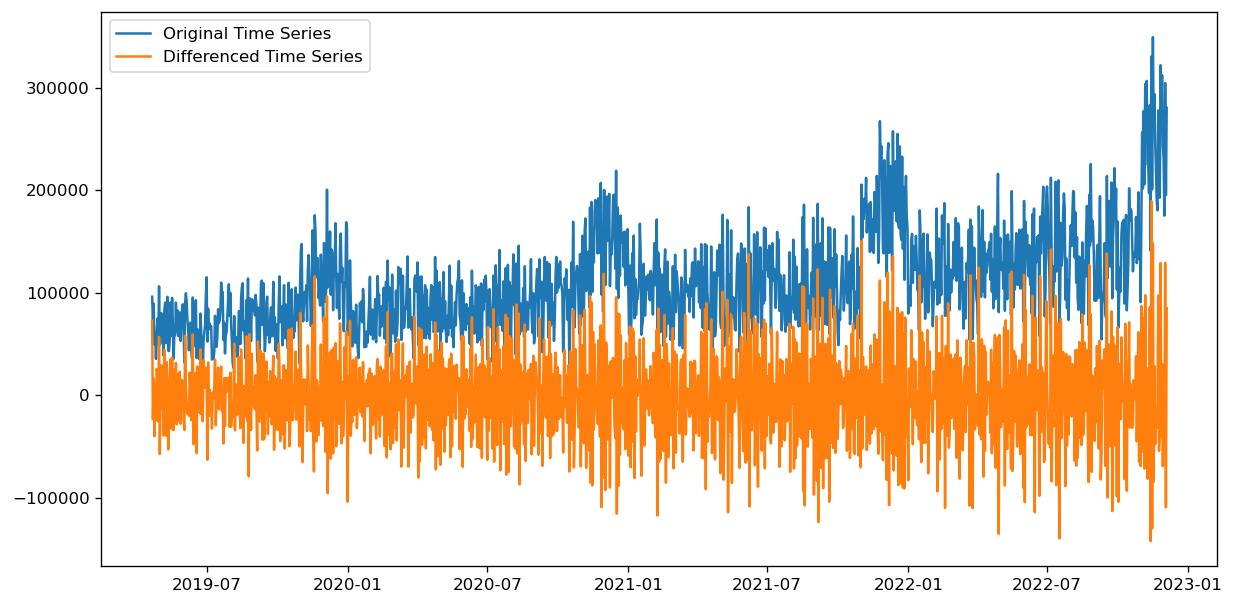

In [239]:
# Create a new column for the differences
indexedDataset['differences'] = indexedDataset['Sales Amount'].diff()

# Drop the first row (since it will contain NaN)
indexedDataset = indexedDataset.dropna()

# Plot the original time series and the differences

plt.figure(figsize=(12, 6))
plt.plot(indexedDataset['Sales Amount'], label='Original Time Series')
plt.plot(indexedDataset['differences'], label='Differenced Time Series')
plt.legend()
plt.show()

In [340]:
from statsmodels.tsa.stattools import adfuller
def  test_stationaritydiff(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=30).mean()
    movingSTD = timeseries.rolling(window=30).std()
    
    #Plot Rolling Statistics
    orig = plt.plot(timeseries, color='blue',label='DataSet')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Performing Dickey - Fuller Test
    print('Results of Dickey Fuller Test')
    dftest = adfuller(indexedDataset['differences'])
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-Value','#Lags Used','No. Of Observations Used'])
    print(dfoutput)     
    print('\nCritical Values: ')
    for key, val in dftest[4].items():
        print(key,':',val)
        if dftest[0] < val:
            print('Null Hypothesis Rejected. Time Series is Stationary')
        else:
            print('Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence')

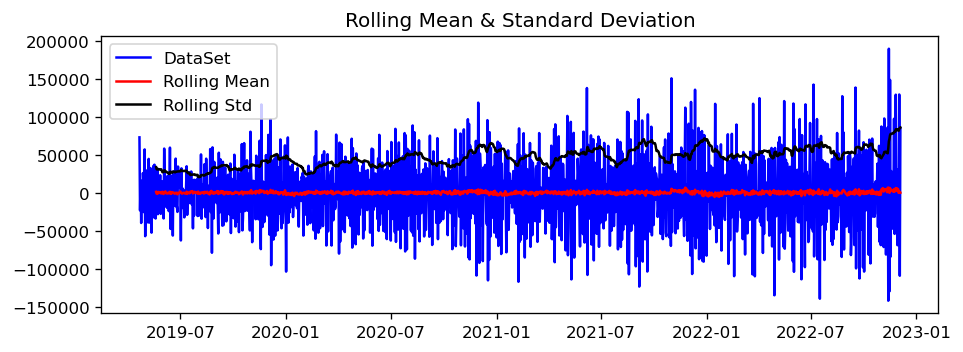

Results of Dickey Fuller Test
Test Statistic             -1.800472e+01
P-Value                     2.726931e-30
#Lags Used                  1.000000e+01
No. Of Observations Used    1.313000e+03
dtype: float64

Critical Values: 
1% : -3.435340198430096
Null Hypothesis Rejected. Time Series is Stationary
5% : -2.863743768394356
Null Hypothesis Rejected. Time Series is Stationary
10% : -2.567943297315671
Null Hypothesis Rejected. Time Series is Stationary


In [341]:
test_stationaritydiff(indexedDataset['differences'])

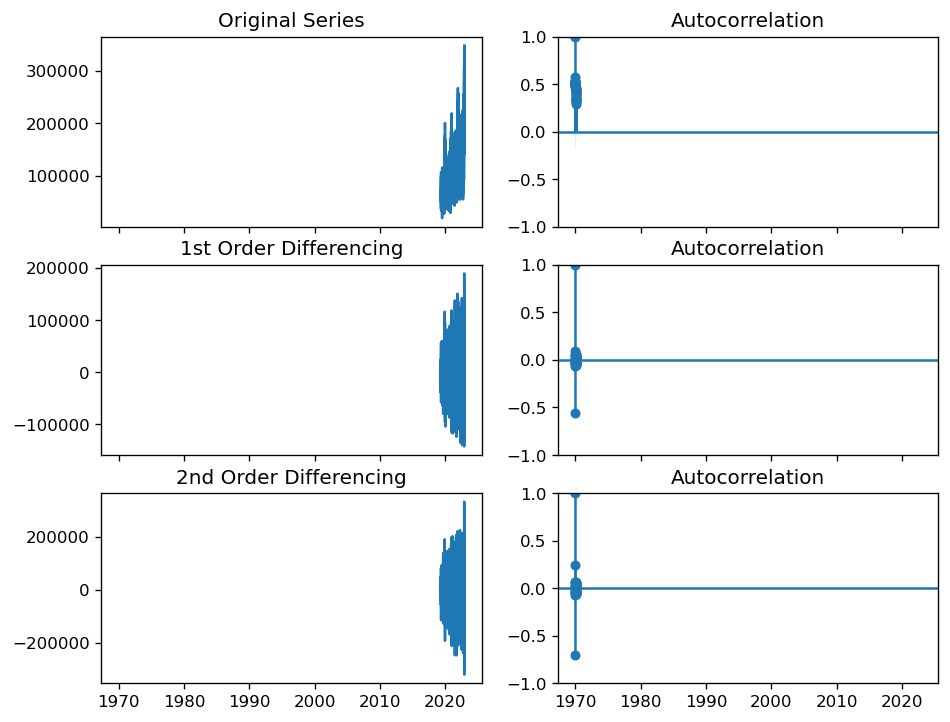

In [240]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(indexedDataset['Sales Amount']); axes[0, 0].set_title('Original Series')
plot_acf(indexedDataset['Sales Amount'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(indexedDataset['Sales Amount'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(indexedDataset['Sales Amount'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(indexedDataset['Sales Amount'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(indexedDataset['Sales Amount'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [248]:
# Performing Dickey - Fuller Test
from statsmodels.tsa.stattools import adfuller 

print('Results of Dickey Fuller Test')
dftest = adfuller(indexedDataset['differences'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-Value','#Lags Used','No. Of Observations Used'])

print(dfoutput)   

print('\nCritical Values: ')
for key, val in dftest[4].items():
    print(key,':',val)
    if dftest[0] < val:
        print('Null Hypothesis Rejected. Time Series is Stationary')
    else:
        print('Null Hypothesis Accepted. The Time series is non-stationary with a high degree of confidence')

Results of Dickey Fuller Test
Test Statistic             -1.800472e+01
P-Value                     2.726931e-30
#Lags Used                  1.000000e+01
No. Of Observations Used    1.313000e+03
dtype: float64

Critical Values: 
1% : -3.435340198430096
Null Hypothesis Rejected. Time Series is Stationary
5% : -2.863743768394356
Null Hypothesis Rejected. Time Series is Stationary
10% : -2.567943297315671
Null Hypothesis Rejected. Time Series is Stationary


<Figure size 1440x720 with 0 Axes>

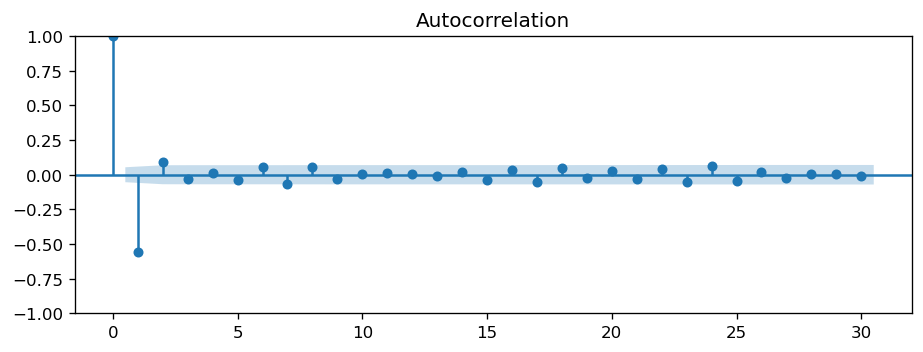

In [243]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(indexedDataset['differences'], lags=30, alpha=0.05)
plt.show()

<Figure size 1440x720 with 0 Axes>

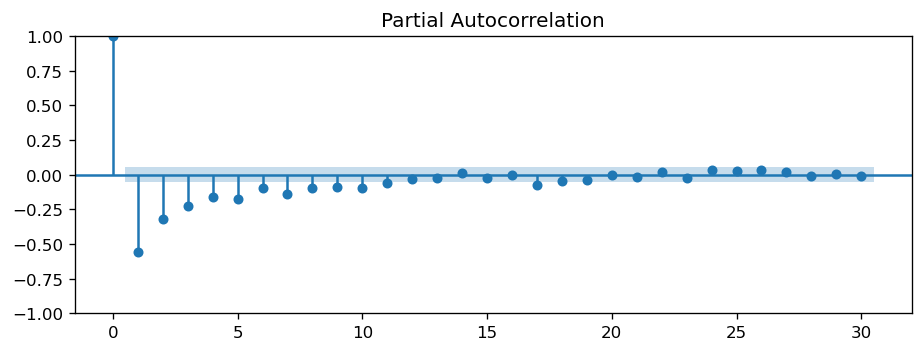

In [244]:
plt.figure(figsize=(12, 6))
plot_pacf(indexedDataset['differences'], lags=30, alpha=0.05)
plt.show()

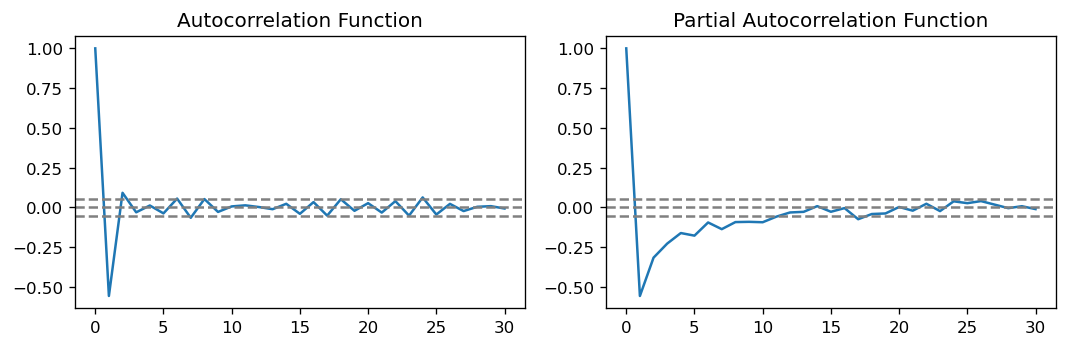

In [249]:
#(ACF - Autocorrelation Function) and (PACF - Partial Autocorrelation Function plots
"""
ACF:- Correlation between time series with a lagged version of itself.Say,we have a time series, and basically it makes 
multiple “copies” (as in “copy and paste”) of it, understanding that each copy is going to be offset by one entry from 
the prior copy 

PACF:- The correlation between observations at two time spots given that we consider both observations are correlated 
to observations at other time spots.
"""

from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(indexedDataset['differences'], nlags = 30)
lag_pacf = pacf(indexedDataset['differences'], nlags = 30, method='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDataset['differences'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexedDataset['differences'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDataset['differences'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexedDataset['differences'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


                               SARIMAX Results                                
Dep. Variable:            differences   No. Observations:                  926
Model:                 ARIMA(2, 2, 1)   Log Likelihood              -11285.555
Date:                Sun, 12 Feb 2023   AIC                          22579.111
Time:                        17:37:11   BIC                          22598.425
Sample:                    04-21-2019   HQIC                         22586.480
                         - 11-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0720      0.045    -23.573      0.000      -1.161      -0.983
ar.L2         -0.5297      0.045    -11.765      0.000      -0.618      -0.441
ma.L1         -0.9986      0.069    -14.563      0.0

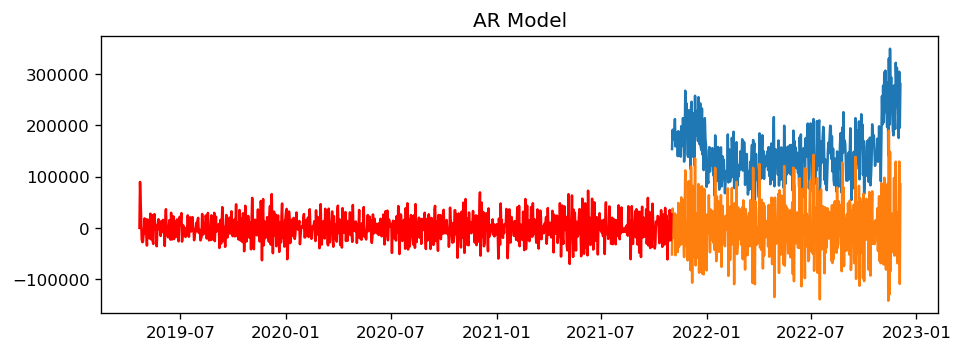

In [346]:
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and test sets
training_data = indexedDataset[:int(0.7*len(indexedDataset))]
test_data = indexedDataset[int(0.7*len(indexedDataset)):]

# print(training_data);
# print(test_data)

# Fit an ARIMA model to the training data
model = ARIMA(training_data['differences'], order=(2,2,1))
model_fit = model.fit()
print(model_fit.summary())
#Auto Regression Model
plt.plot(test_data)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('AR Model')
print('Plotting AR Model')


                               SARIMAX Results                                
Dep. Variable:            differences   No. Observations:                  926
Model:                 ARIMA(2, 2, 1)   Log Likelihood              -11285.555
Date:                Sun, 12 Feb 2023   AIC                          22579.111
Time:                        17:36:39   BIC                          22598.425
Sample:                    04-21-2019   HQIC                         22586.480
                         - 11-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0720      0.045    -23.573      0.000      -1.161      -0.983
ar.L2         -0.5297      0.045    -11.765      0.000      -0.618      -0.441
ma.L1         -0.9986      0.069    -14.563      0.0

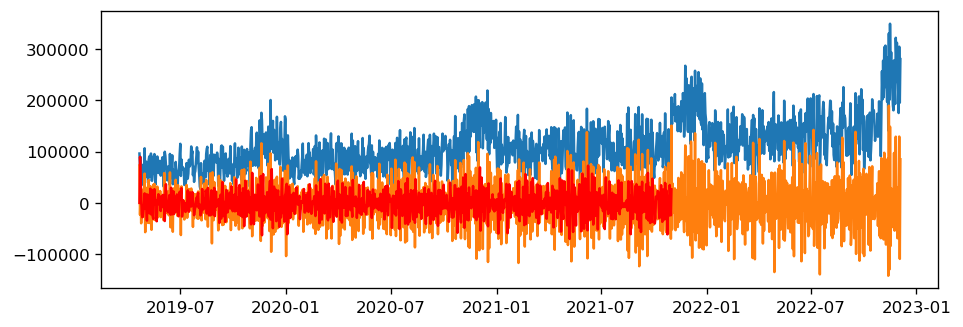

In [345]:

model = ARIMA(training_data['differences'], order=(2,2,1))
results_MA  = model.fit()
print(results_MA.summary())
plt.plot(indexedDataset)
plt.plot(results_ARIMA.fittedvalues, color='red')
print('Plotting ARIMA Model')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


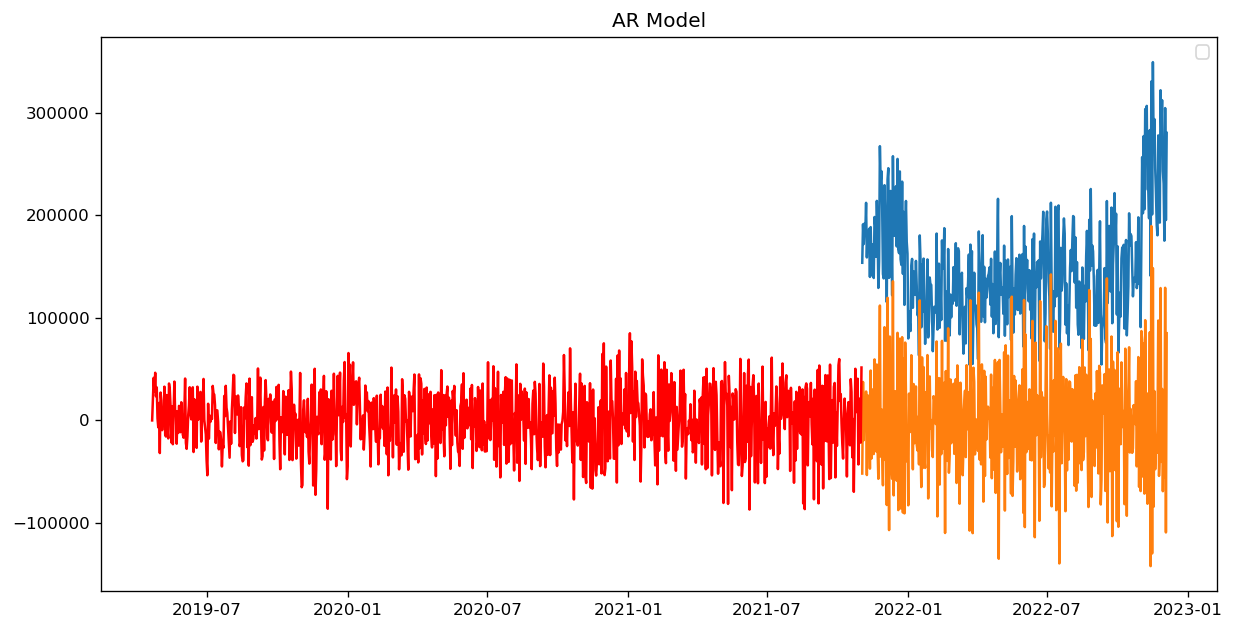

In [252]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Split the data into training and test sets
training_data = indexedDataset[:int(0.7*len(indexedDataset))]
test_data = indexedDataset[int(0.7*len(indexedDataset)):]

# print(training_data);
# print(test_data)

# Fit an ARIMA model to the training data
model = ARIMA(training_data['differences'], order=(1,1,2))
model_fit = model.fit()

#Auto Regression Model
plt.figure(figsize=(12, 6))
plt.plot(test_data)
plt.plot(model_fit.fittedvalues, color='red')

plt.title('AR Model')
plt.legend()
plt.show()


In [291]:
import statsmodels
statsmodels.__version__

'0.13.2'

In [293]:
pip install statsmodels --upgrade

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 9.2/9.2 MB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [253]:
indexedDataset

,Sales Amount,differences
InvoiceDate,,
2019-04-21,96254,72924.0
2019-04-22,73025,-23229.0
2019-04-23,89384,16359.0
2019-04-24,49600,-39784.0
2019-04-25,60077,10477.0
...,...,...
2022-11-30,230929,-12359.0
2022-12-01,175264,-55665.0
2022-12-02,304611,129347.0


In [268]:
prediction_ARIMA_diff = pd.Series(model_fit.fittedvalues, copy = True)
print(prediction_ARIMA_diff.head())

InvoiceDate
2019-04-21        0.000000
2019-04-22    21672.069733
2019-04-23    41558.640109
2019-04-24    28203.433164
2019-04-25    46478.092686
dtype: float64


In [270]:
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

InvoiceDate
2019-04-21         0.000000
2019-04-22     21672.069733
2019-04-23     63230.709842
2019-04-24     91434.143006
2019-04-25    137912.235691
dtype: float64


In [271]:
prediction_ARIMA_log = pd.Series(indexedDataset['Sales Amount'], index=indexedDataset_logscale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value=0)
prediction_ARIMA_log.head()

InvoiceDate
2019-04-20              NaN
2019-04-21     96254.000000
2019-04-22     94697.069733
2019-04-23    152614.709842
2019-04-24    141034.143006
dtype: float64

In [273]:
prediction_ARIMA_log

InvoiceDate
2019-04-20              NaN
2019-04-21     96254.000000
2019-04-22     94697.069733
2019-04-23    152614.709842
2019-04-24    141034.143006
                  ...      
2022-11-30    230929.000000
2022-12-01    175264.000000
2022-12-02    304611.000000
2022-12-03    195378.000000
2022-12-04    280438.000000
Length: 1325, dtype: float64

In [274]:
predictions_ARIMA = np.exp(prediction_ARIMA_log)
predictions_ARIMA

InvoiceDate
2019-04-20    NaN
2019-04-21    inf
2019-04-22    inf
2019-04-23    inf
2019-04-24    inf
             ... 
2022-11-30    inf
2022-12-01    inf
2022-12-02    inf
2022-12-03    inf
2022-12-04    inf
Length: 1325, dtype: float64

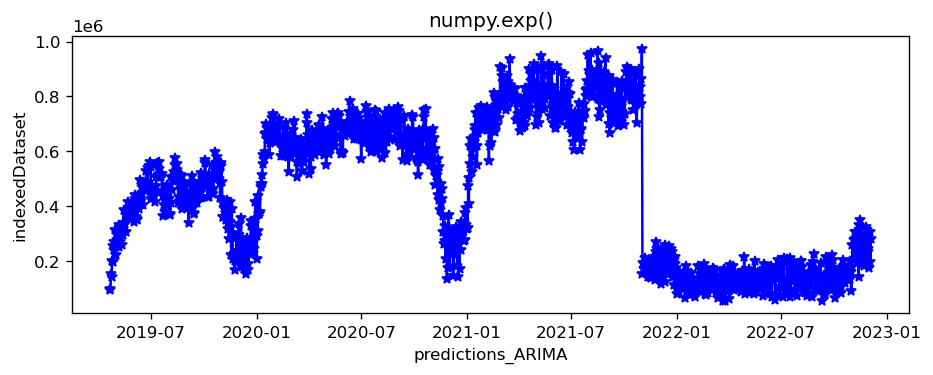

In [332]:
predictions_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(prediction_ARIMA_log, color = 'blue', marker = "*")
#plt.plot(indexedDataset)
#plt.plot(prediction_ARIMA_log)

plt.plot(predictions_ARIMA, color = 'red', marker = "o")
plt.title("numpy.exp()")
plt.xlabel("predictions_ARIMA")
plt.ylabel("indexedDataset")
plt.show()  

In [276]:
indexedDataset_logscale

,Sales Amount
InvoiceDate,
2019-04-20,10.057495
2019-04-21,11.474746
2019-04-22,11.198557
2019-04-23,11.400697
2019-04-24,10.811746
...,...
2022-11-30,12.349866
2022-12-01,12.074049
2022-12-02,12.626791


TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

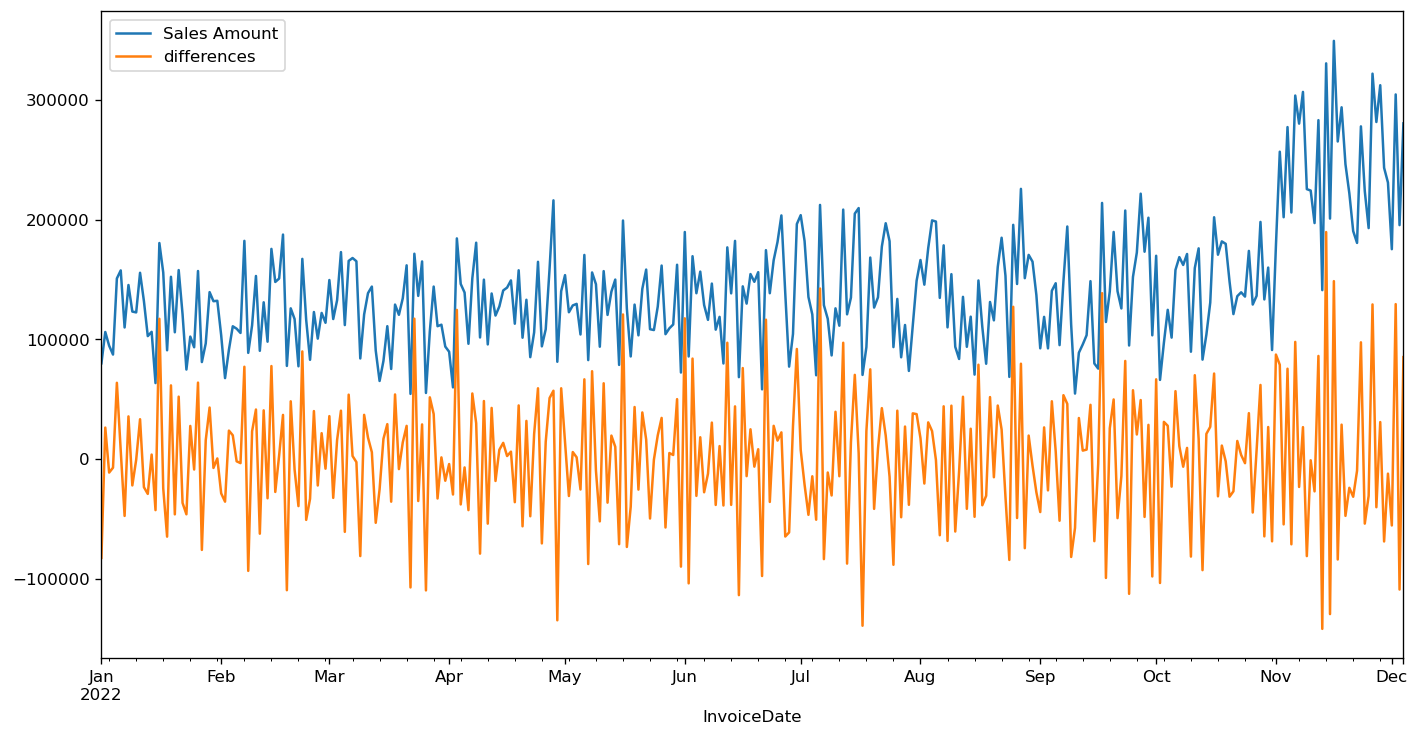

In [331]:
pred = model_fit.get_prediction(start=pd.to_datetime('2022-01-01'), dynamic=False)
pred_val = pred.conf_int()
ax = indexedDataset['2022':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_val.index,
                pred_val.iloc[:, 0],
                pred_val.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('DATE')
ax.set_ylabel('SALES')
plt.legend()
plt.show()

2021-11-02   -106712.542973
2021-11-03     13773.737540
2021-11-04     -1717.961077
2021-11-05       273.906586
2021-11-06        17.799307
2021-11-07        50.728672
2021-11-08        46.494731
2021-11-09        47.039116
2021-11-10        46.969121
2021-11-11        46.978121
2021-11-12        46.976964
2021-11-13        46.977113
2021-11-14        46.977094
2021-11-15        46.977096
2021-11-16        46.977096
2021-11-17        46.977096
2021-11-18        46.977096
2021-11-19        46.977096
2021-11-20        46.977096
2021-11-21        46.977096
2021-11-22        46.977096
2021-11-23        46.977096
2021-11-24        46.977096
2021-11-25        46.977096
2021-11-26        46.977096
2021-11-27        46.977096
2021-11-28        46.977096
2021-11-29        46.977096
2021-11-30        46.977096
2021-12-01        46.977096
Freq: D, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'Forecast')

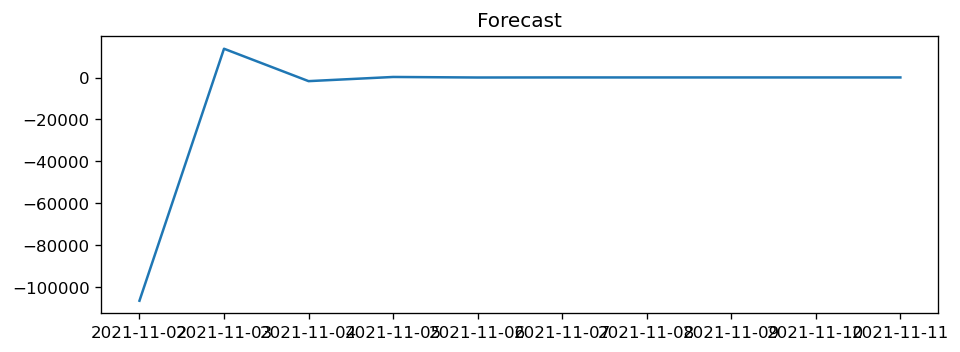

In [285]:

model_fit.forecast(steps=30)
print(model_fit.forecast(steps=30))
plt.plot(model_fit.forecast(steps=10))
plt.title('Forecast')

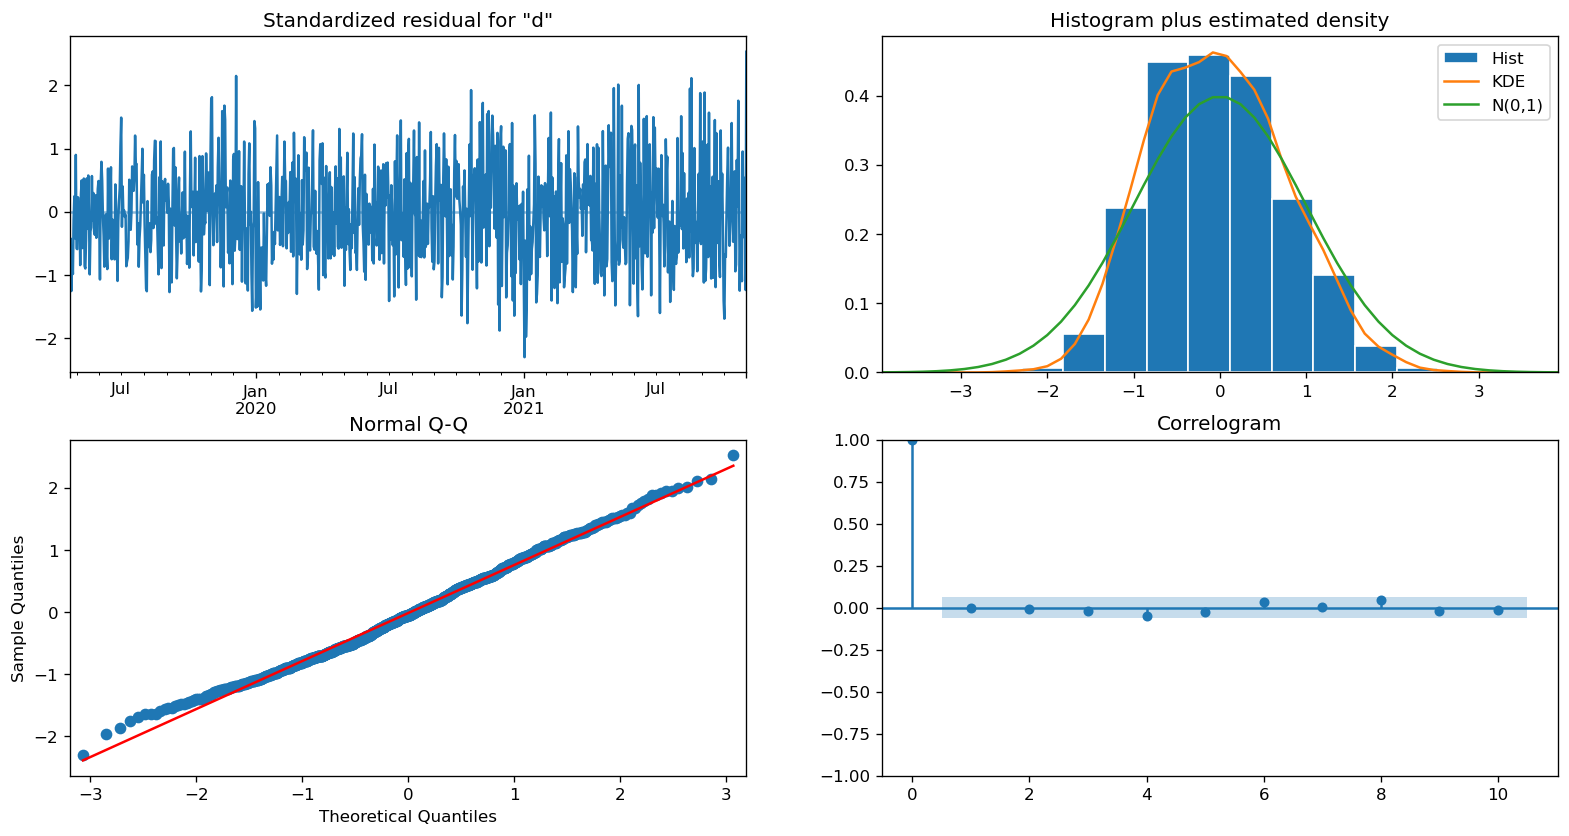

In [286]:
model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

In [287]:
new_data = pd.DataFrame(indexedDataset['Sales Amount'].resample('D').mean())
new_data = indexedDataset.interpolate(method = 'linear')
print(new_data)

             Sales Amount  differences
InvoiceDate                           
2019-04-21          96254      72924.0
2019-04-22          73025     -23229.0
2019-04-23          89384      16359.0
2019-04-24          49600     -39784.0
2019-04-25          60077      10477.0
...                   ...          ...
2022-11-30         230929     -12359.0
2022-12-01         175264     -55665.0
2022-12-02         304611     129347.0
2022-12-03         195378    -109233.0
2022-12-04         280438      85060.0

[1324 rows x 2 columns]


In [379]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(new_data['differences'],order=(1, 1, 1),seasonal_order=(1,1,1,60))
results=model.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5586      0.056     -9.936      0.000      -0.669      -0.448
ma.L1         -0.9967      0.051    -19.492      0.000      -1.097      -0.896
ar.S.L60      -0.0483      0.091     -0.533      0.594      -0.226       0.129
ma.S.L60      -0.8131      0.069    -11.856      0.000      -0.948      -0.679
sigma2      4.201e+09   5.82e-12   7.22e+20      0.000     4.2e+09     4.2e+09


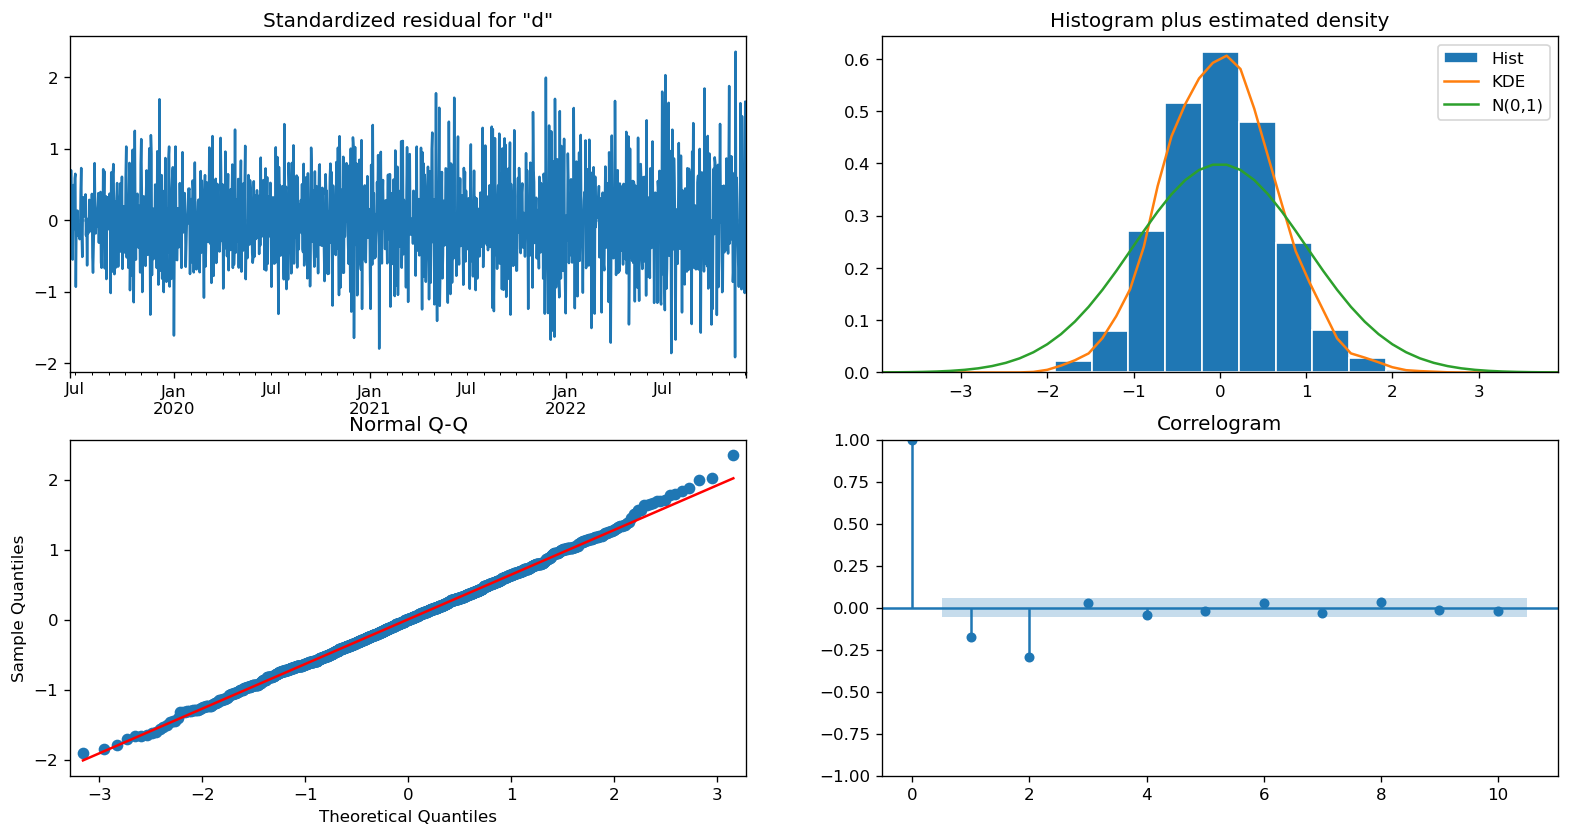

In [380]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

2022-12-05   -51196.130140
2022-12-06    24680.962511
2022-12-07    -6973.563532
2022-12-08   -13748.177825
2022-12-09     2712.865581
Freq: D, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'Forecast')

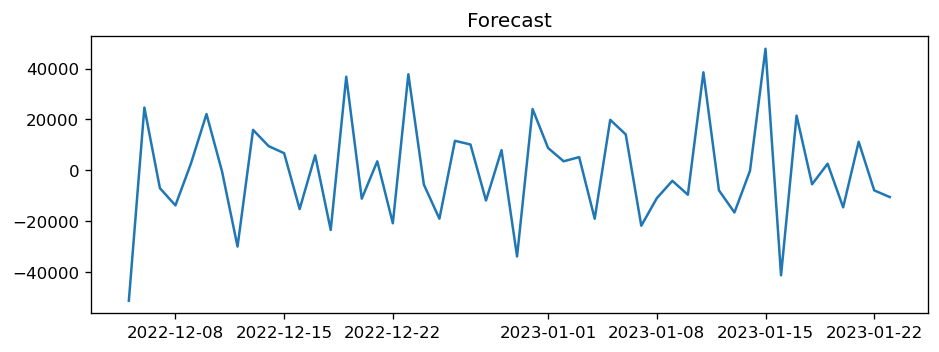

In [381]:
#results_ARIMA.plot_predict(1,1690)
results.forecast(steps=1690)
print(results.forecast(steps=5))
plt.plot(results.forecast(steps=50))
plt.title('Forecast')

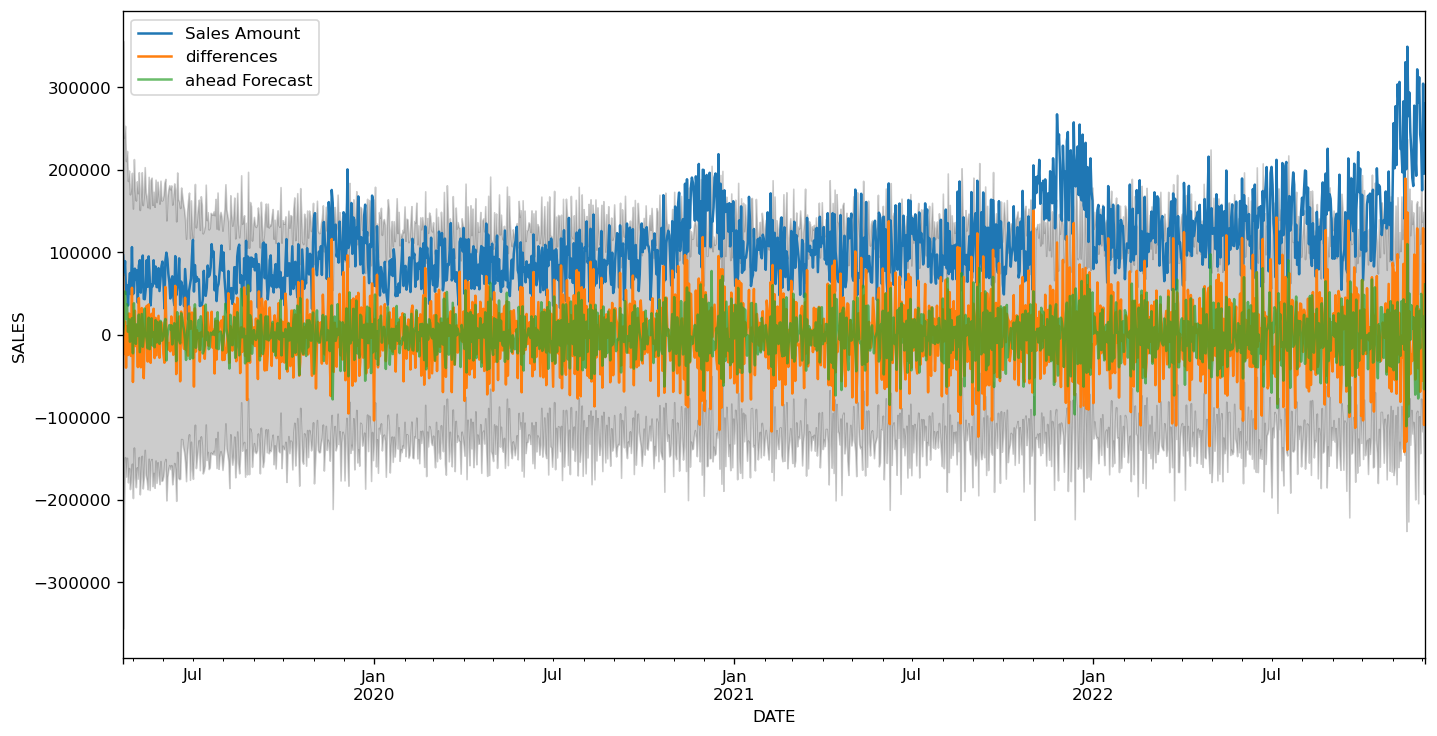

In [382]:
pred = results.get_prediction(start=pd.to_datetime('2019-04-21'), dynamic=False)
pred_val = pred.conf_int()
ax = new_data['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_val.index,
                pred_val.iloc[:, 0],
                pred_val.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('DATE')
ax.set_ylabel('SALES')
plt.legend()
plt.show()


In [383]:
y_forecasted = pred.predicted_mean
y_truth = new_data['differences']
print(y_forecasted)
print(y_truth)



2019-04-21        0.000000
2019-04-22    16099.635531
2019-04-23    52575.412915
2019-04-24    19424.341710
2019-04-25    36939.661893
                  ...     
2022-11-30    49723.712163
2022-12-01    10171.140499
2022-12-02    21974.719451
2022-12-03   -65920.319551
2022-12-04    61257.479316
Freq: D, Name: predicted_mean, Length: 1324, dtype: float64
InvoiceDate
2019-04-21     72924.0
2019-04-22    -23229.0
2019-04-23     16359.0
2019-04-24    -39784.0
2019-04-25     10477.0
                ...   
2022-11-30    -12359.0
2022-12-01    -55665.0
2022-12-02    129347.0
2022-12-03   -109233.0
2022-12-04     85060.0
Name: differences, Length: 1324, dtype: float64


In [384]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_forecasted, y_truth)
rmse = sqrt(mse)
print(rmse)
print('The Mean Squared Error of the forecasts is {}'.format(round(rmse, 2)))

41285.48097926457
The Mean Squared Error of the forecasts is 41285.48
